In [28]:
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

In [29]:
data_high_bound = 150
data_low_bound = -200
need_to_normalized = False

data = pd.read_excel('./dataset/rt_df_thermo1.xlsx')
data.head()

,ID,formula,the thermal expansion,Normalized_Formulas
0,1,Fe3Ni,14.00,Fe0.7500Ni0.2500
1,2,Fe3Ni0.5Pt0.5,16.80,Fe0.7500Ni0.1250Pt0.1250
2,3,Fe3Pt,-30.00,Fe0.7500Pt0.2500
3,4,Fe0.75Pt0.25,-26.00,Fe0.7500Pt0.2500
4,5,Fe0.75Ni0.125Pt0.125,11.37,Fe0.7500Ni0.1250Pt0.1250


In [30]:
# 函数：解析化学成分及其比例
from collections import defaultdict
def parse_normalized_formulas(formula):
    """
    将Normalized_Formulas解析为化学成分及其比例。
    返回一个字典，键为化学成分，值为比例。
    """
    element_count = defaultdict(float)
    elements = re.findall(r'([A-Z][a-z]*)(\d*\.?\d*)', formula)
    for element, ratio in elements:
        # 如果没有数量则默认为1
        count = float(ratio) if ratio else 1.0
        element_count[element] += count
    return dict(element_count)
    # return {element: float(ratio) for element, ratio in elements}

In [31]:
# 提取所有化学成分
all_elements = set()
for formula in data['formula']:
    parsed = parse_normalized_formulas(formula)
    all_elements.update(parsed.keys())

In [32]:
all_elements

{'Al',
 'As',
 'B',
 'Ba',
 'Bi',
 'Br',
 'C',
 'Ca',
 'Cd',
 'Ce',
 'Co',
 'Cr',
 'Cs',
 'Cu',
 'Dy',
 'Er',
 'Eu',
 'F',
 'Fe',
 'Ga',
 'Gd',
 'Ge',
 'H',
 'Hf',
 'Ho',
 'I',
 'In',
 'K',
 'La',
 'Lu',
 'Mg',
 'Mn',
 'Mo',
 'N',
 'Nb',
 'Nd',
 'Ni',
 'O',
 'Os',
 'P',
 'Pb',
 'Pr',
 'Pt',
 'Rb',
 'Re',
 'Rh',
 'Ru',
 'S',
 'Sb',
 'Sc',
 'Se',
 'Si',
 'Sm',
 'Sn',
 'Sr',
 'Ta',
 'Tb',
 'Te',
 'Th',
 'Ti',
 'V',
 'W',
 'Y',
 'Yb',
 'Zn',
 'Zr'}

In [33]:
# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    data[element] = data['formula'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

In [34]:
data.head()

,ID,formula,the thermal expansion,Normalized_Formulas,Al,As,B,Ba,Bi,Br,...,Tb,Te,Th,Ti,V,W,Y,Yb,Zn,Zr
0,1,Fe3Ni,14.00,Fe0.7500Ni0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Fe3Ni0.5Pt0.5,16.80,Fe0.7500Ni0.1250Pt0.1250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Fe3Pt,-30.00,Fe0.7500Pt0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Fe0.75Pt0.25,-26.00,Fe0.7500Pt0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Fe0.75Ni0.125Pt0.125,11.37,Fe0.7500Ni0.1250Pt0.1250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df = data.copy()
df = df.drop('formula', axis=1)
df = df.drop('Normalized_Formulas', axis=1)
df = df.drop('ID', axis=1)
df.head()

,the thermal expansion,Al,As,B,Ba,Bi,Br,C,Ca,Cd,...,Tb,Te,Th,Ti,V,W,Y,Yb,Zn,Zr
0,14.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-26.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.loc[[0]]

,the thermal expansion,Al,As,B,Ba,Bi,Br,C,Ca,Cd,...,Tb,Te,Th,Ti,V,W,Y,Yb,Zn,Zr
0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

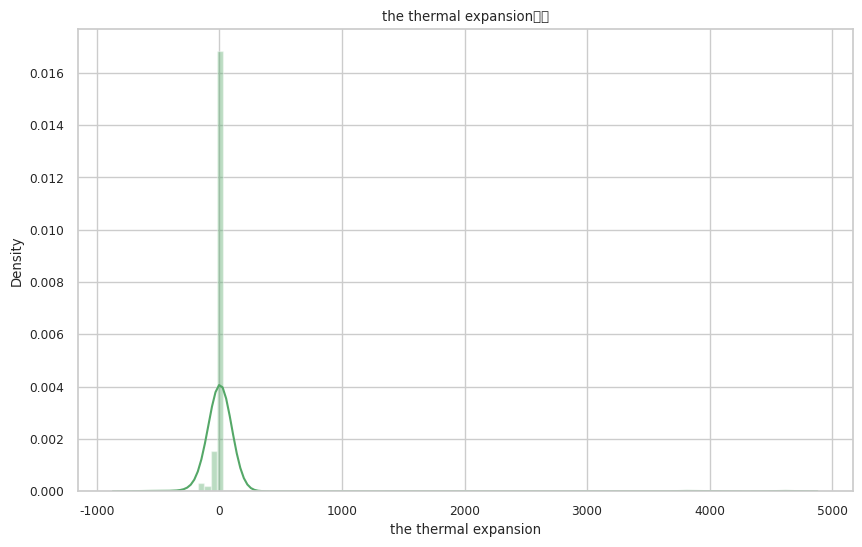

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

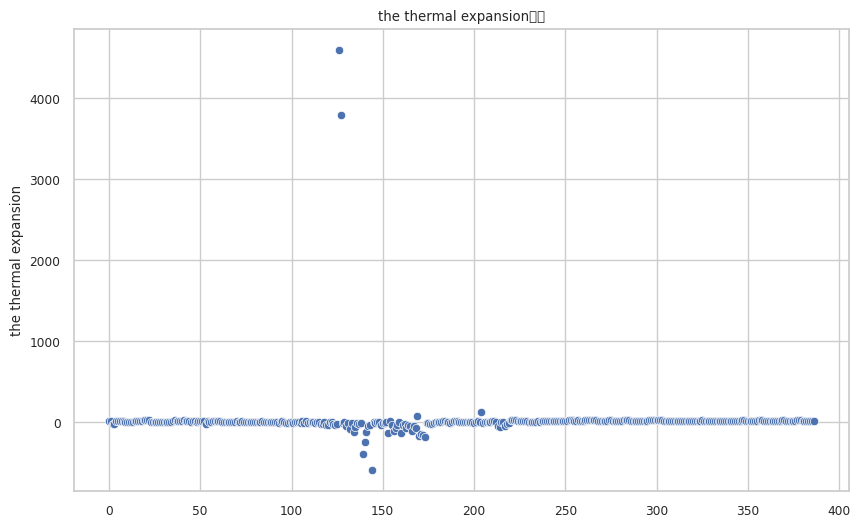

In [37]:
import class_plotpicture as pl
# 绘制目标特征的条形图
pl.plot_prediction_feature(df, 'the thermal expansion', 'ImageOfThermal')

# 可见需要把大于3000的视为异常值

In [38]:
# 删除 'the thermal expansion' 列中大于 3000 的行
df_cleaned = df[df['the thermal expansion'] <= data_high_bound]

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

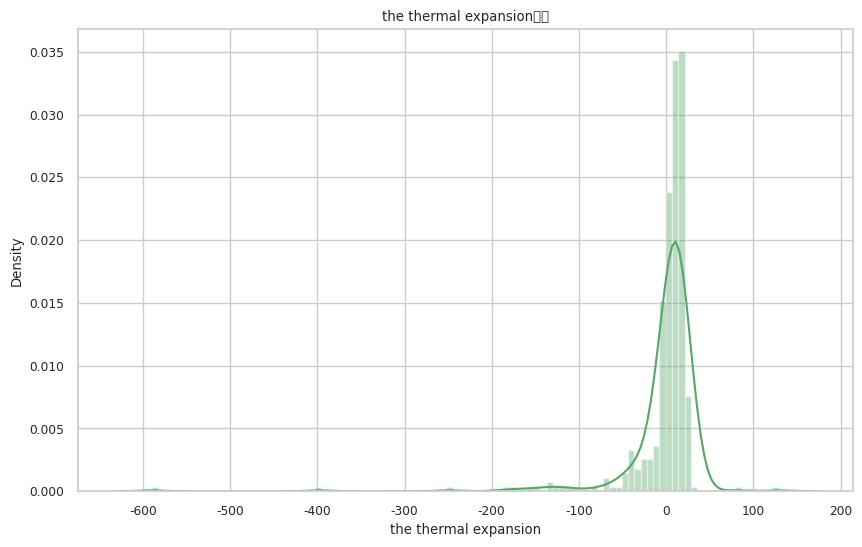

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

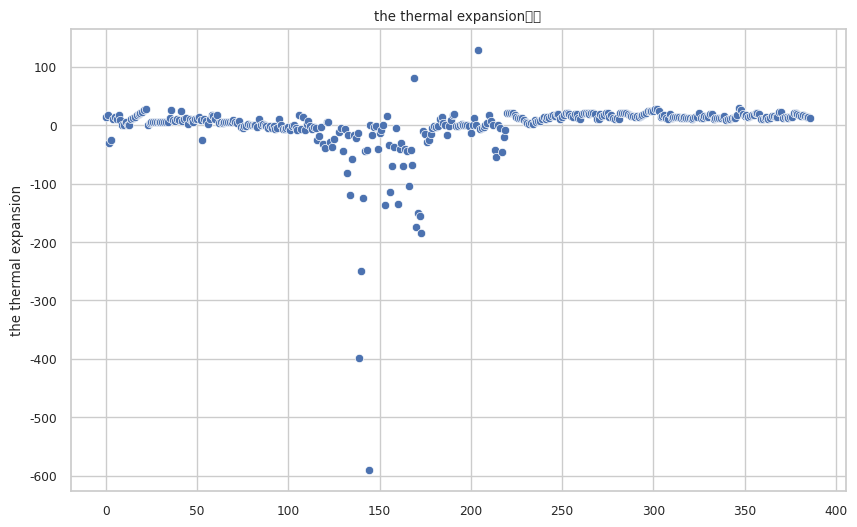

In [39]:
import class_plotpicture as pl

# 绘制目标特征的条形图
pl.plot_prediction_feature(df_cleaned, 'the thermal expansion', 'ImageOfThermal')

In [40]:
# 删除 'the thermal expansion' 列中小于 -200 的行
df_cleaned = df_cleaned[df_cleaned['the thermal expansion'] >= data_low_bound]

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

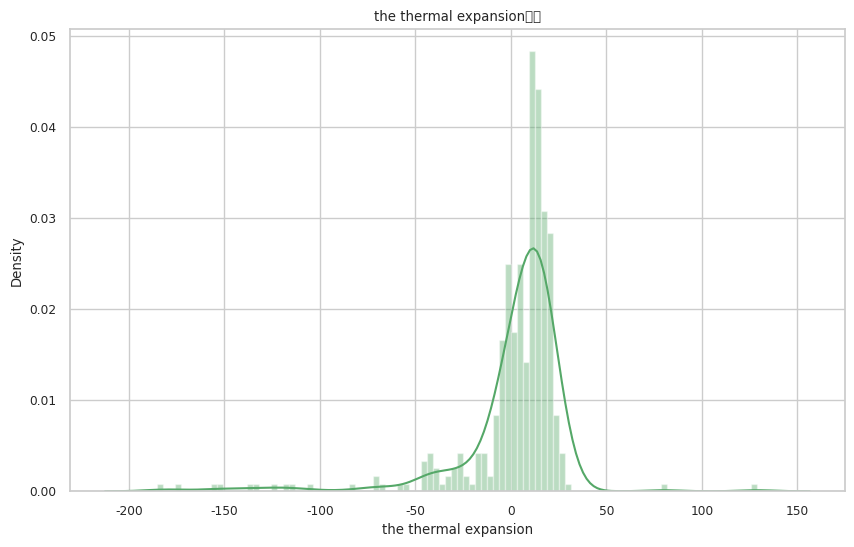

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

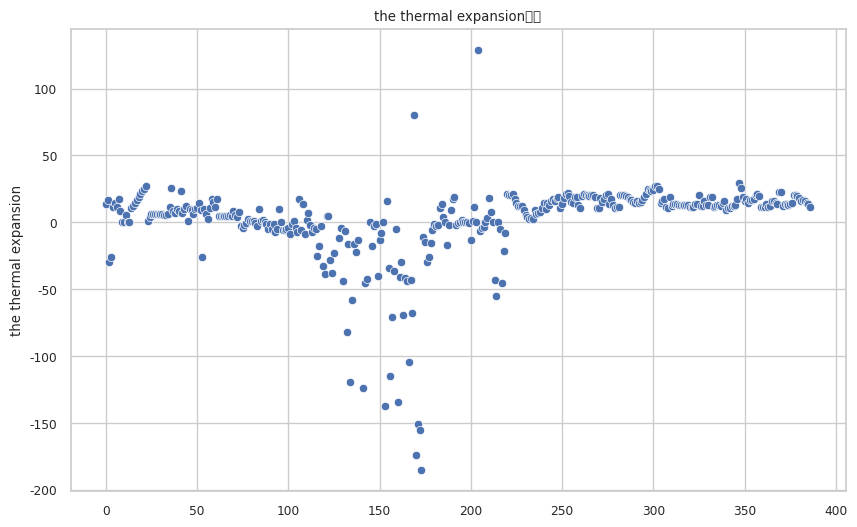

In [41]:
import class_plotpicture as pl

# 绘制目标特征的条形图
pl.plot_prediction_feature(df_cleaned, 'the thermal expansion', 'ImageOfThermal')

# 大致符合正态分布

# 划分数据，进行训练和测试

In [42]:
all_features = df_cleaned.drop('the thermal expansion', axis=1)
all_labels = df_cleaned['the thermal expansion']
print(f'全部的特征：{all_features.shape}')
print(f'全部的标签：{all_labels.shape}')

全部的特征：(382, 66)
全部的标签：(382,)


In [43]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 标准化特征
scaler = StandardScaler()
all_labels_scaler = scaler.fit_transform(np.array(all_labels).reshape(-1, 1))

In [44]:
from sklearn.model_selection import train_test_split
# 将总的数据集分开
if need_to_normalized:
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels_scaler, test_size=0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)
print(f'训练集的特征：{X_train.shape}, 标签：{y_train.shape}')
print(f'测试集的特征：{X_test.shape}, 标签：{y_test.shape}')

训练集的特征：(305, 66), 标签：(305,)
测试集的特征：(77, 66), 标签：(77,)


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 超参数探究

第2个
第3个
第4个
第5个
第6个
第7个
第8个
第9个
第10个
第11个
第12个
第13个
第14个
第15个
第16个
第17个
第18个
第19个
第20个
第21个
第22个
第23个
第24个
第25个
第26个
第27个
第28个
第29个
第30个
第31个
第32个
第33个
第34个
第35个
第36个
第37个
第38个
第39个
第40个
第41个
第42个
第43个
第44个
第45个
第46个
第47个
第48个
第49个
第50个
第51个
第52个
第53个
第54个
第55个
第56个
第57个
第58个
第59个
第60个
第61个
第62个
第63个
第64个
第65个
第66个
第67个
第68个
第69个
第70个
第71个
第72个
第73个
第74个
第75个
第76个
第77个
第78个
第79个
第80个
第81个
第82个
第83个
第84个
第85个
第86个
第87个
第88个
第89个
第90个
第91个
第92个
第93个
第94个
第95个
第96个
第97个
第98个
第99个
第100个
第101个
第102个
第103个
第104个
第105个
第106个
第107个
第108个
第109个
第110个
第111个
第112个
第113个
第114个
第115个
第116个
第117个
第118个
第119个
第120个
第121个
第122个
第123个
第124个
第125个
第126个
第127个
第128个
第129个
第130个
第131个
第132个
第133个
第134个
第135个
第136个
第137个
第138个
第139个
第140个
第141个
第142个
第143个
第144个
第145个
第146个
第147个
第148个
第149个
第150个
第151个
第152个
第153个
第154个
第155个
第156个
第157个
第158个
第159个
第160个
第161个
第162个
第163个
第164个
第165个
第166个
第167个
第168个
第169个
第170个
第171个
第172个
第173个
第174个
第175个
第176个
第177个
第178个
第179个
第180个
第181个
第182个
第183个
第184个
第185个
第1

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

在随机森林调优n_estimators过程中，最好的效果：mse:161.93835, r2:0.81740, n_estimators:3


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

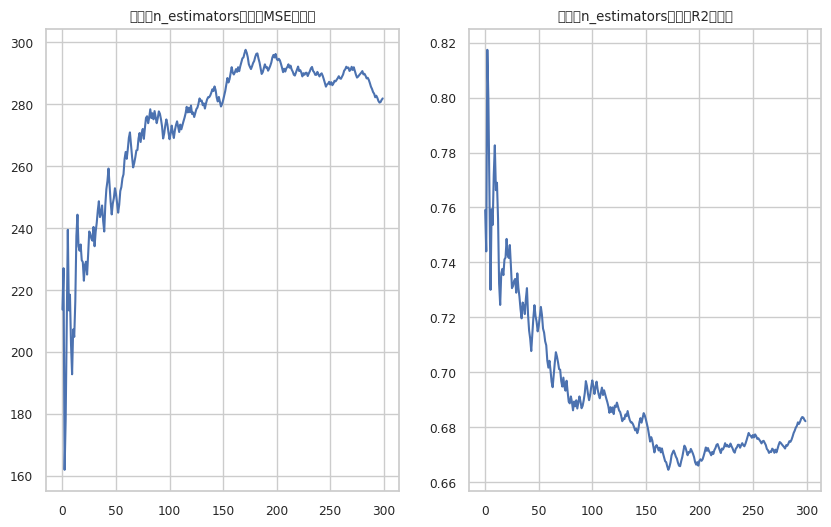

In [47]:
# 统计不同的值对随机森林的变化
cllo_mse = []
cllo_r2 = []
best_idx, best_mse, best_r2 = 0, 1000, 0
# 先查找 n_estimators ，其他参数默认
for i in range(1, 301):
    print(f'第{i+1}个')
    clf = RandomForestRegressor(random_state=42, n_estimators=i)
    # 在训练集上拟合模型
    clf.fit(X_train,y_train)
    # 对测试集进行预测
    label_pred = clf.predict(X_test)
    # 计算MSE(平均误差)和精确度
    mse = mean_squared_error(y_test, label_pred)
    r2 = r2_score(y_test, label_pred)
    cllo_mse.append(mse)
    cllo_r2.append(r2)
    if best_mse > mse:
        best_mse = mse
        best_idx = i
        best_r2 = r2
print(f'在随机森林调优n_estimators过程中，最好的效果：mse:{best_mse:.5f}, r2:{best_r2:.5f}, n_estimators:{best_idx}')

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(cllo_mse)
plt.title('在调节n_estimators参数时MSE的变化')
plt.subplot(122)
plt.plot(cllo_r2)
plt.title('在调节n_estimators参数时R2的变化')
plt.show()

第2个
第3个
第4个
第5个
第6个
第7个
第8个
第9个
第10个
第11个
第12个
第13个
第14个
第15个
第16个
第17个
第18个
第19个
第20个
第21个
第22个
第23个
第24个
第25个
第26个
第27个
第28个
第29个
第30个
第31个
第32个
第33个
第34个
第35个
第36个
第37个
第38个
第39个
第40个
第41个
第42个
第43个
第44个
第45个
第46个
第47个
第48个
第49个
第50个
第51个
第52个
第53个
第54个
第55个
第56个
第57个
第58个
第59个
第60个
第61个
第62个
第63个
第64个
第65个
第66个
第67个
第68个
第69个
第70个
第71个
第72个
第73个
第74个
第75个
第76个
第77个
第78个
第79个
第80个
第81个
第82个
第83个
第84个
第85个
第86个
第87个
第88个
第89个
第90个
第91个
第92个
第93个
第94个
第95个
第96个
第97个
第98个
第99个
第100个
第101个
第102个
第103个
第104个
第105个
第106个
第107个
第108个
第109个
第110个
第111个
第112个
第113个
第114个
第115个
第116个
第117个
第118个
第119个
第120个
第121个
第122个
第123个
第124个
第125个
第126个
第127个
第128个
第129个
第130个
第131个
第132个
第133个
第134个
第135个
第136个
第137个
第138个
第139个
第140个
第141个
第142个
第143个
第144个
第145个
第146个
第147个
第148个
第149个
第150个
第151个
第152个
第153个
第154个
第155个
第156个
第157个
第158个
第159个
第160个
第161个
第162个
第163个
第164个
第165个
第166个
第167个
第168个
第169个
第170个
第171个
第172个
第173个
第174个
第175个
第176个
第177个
第178个
第179个
第180个
第181个
第182个
第183个
第184个
第185个
第1

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

第299个
第300个
第301个
在随机森林调优max_features过程中，最好的效果：mse:137.81166, r2:0.84461, max_features:24


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

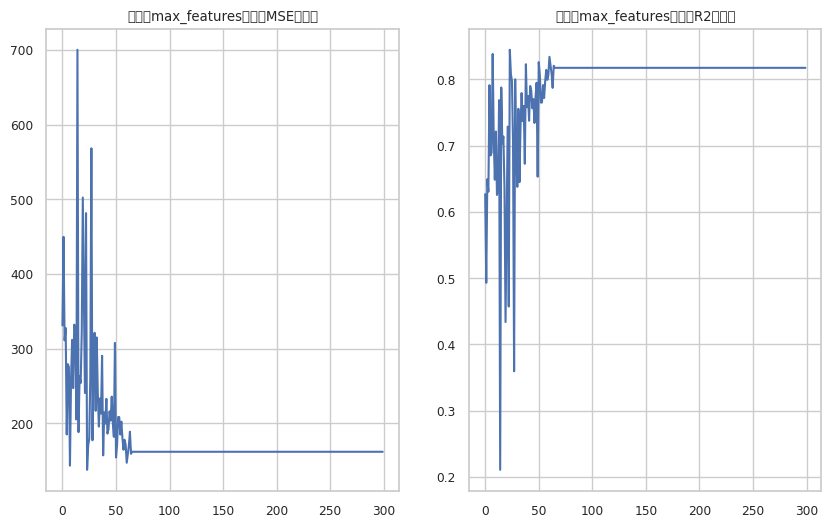

In [48]:
# 统计不同的值对随机森林的变化
cllo_mse = []
cllo_r2 = []
best_idx, best_mse, best_r2 = 0, 1000, 0
# 先查找 n_estimators ，其他参数默认
for i in range(1, 301):
    print(f'第{i+1}个')
    clf = RandomForestRegressor(random_state=42, n_estimators=3, max_features=i)
    # 在训练集上拟合模型
    clf.fit(X_train,y_train)
    # 对测试集进行预测
    label_pred = clf.predict(X_test)
    # 计算MSE(平均误差)和精确度
    mse = mean_squared_error(y_test, label_pred)
    r2 = r2_score(y_test, label_pred)
    cllo_mse.append(mse)
    cllo_r2.append(r2)
    if best_mse > mse:
        best_mse = mse
        best_idx = i
        best_r2 = r2
print(f'在随机森林调优max_features过程中，最好的效果：mse:{best_mse:.5f}, r2:{best_r2:.5f}, max_features:{best_idx}')

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(cllo_mse)
plt.title('在调节max_features参数时MSE的变化')
plt.subplot(122)
plt.plot(cllo_r2)
plt.title('在调节max_features参数时R2的变化')
plt.show()

第2个
第3个
第4个
第5个
第6个
第7个
第8个
第9个
第10个
第11个
第12个
第13个
第14个
第15个
第16个
第17个
第18个
第19个
第20个
第21个
第22个
第23个
第24个
第25个
第26个
第27个
第28个
第29个
第30个
第31个
第32个
第33个
第34个
第35个
第36个
第37个
第38个
第39个
第40个
第41个
第42个
第43个
第44个
第45个
第46个
第47个
第48个
第49个
第50个
第51个
第52个
第53个
第54个
第55个
第56个
第57个
第58个
第59个
第60个
第61个
第62个
第63个
第64个
第65个
第66个
第67个
第68个
第69个
第70个
第71个
第72个
第73个
第74个
第75个
第76个
第77个
第78个
第79个
第80个
第81个
第82个
第83个
第84个
第85个
第86个
第87个
第88个
第89个
第90个
第91个
第92个
第93个
第94个
第95个
第96个
第97个
第98个
第99个
第100个
第101个
第102个
第103个
第104个
第105个
第106个
第107个
第108个
第109个
第110个
第111个
第112个
第113个
第114个
第115个
第116个
第117个
第118个
第119个
第120个
第121个
第122个
第123个
第124个
第125个
第126个
第127个
第128个
第129个
第130个
第131个
第132个
第133个
第134个
第135个
第136个
第137个
第138个
第139个
第140个
第141个
第142个
第143个
第144个
第145个
第146个
第147个
第148个
第149个
第150个
第151个
第152个
第153个
第154个
第155个
第156个
第157个
第158个
第159个
第160个
第161个
第162个
第163个
第164个
第165个
第166个
第167个
第168个
第169个
第170个
第171个
第172个
第173个
第174个
第175个
第176个
第177个
第178个
第179个
第180个
第181个
第182个
第183个
第184个
第185个
第1

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

第271个
第272个
第273个
第274个
第275个
第276个
第277个
第278个
第279个
第280个
第281个
第282个
第283个
第284个
第285个
第286个
第287个
第288个
第289个
第290个
第291个
第292个
第293个
第294个
第295个
第296个
第297个
第298个
第299个
第300个
第301个
在随机森林调优min_samples_leaf过程中，最好的效果：mse:137.81166, r2:0.84461, min_samples_leaf:1


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

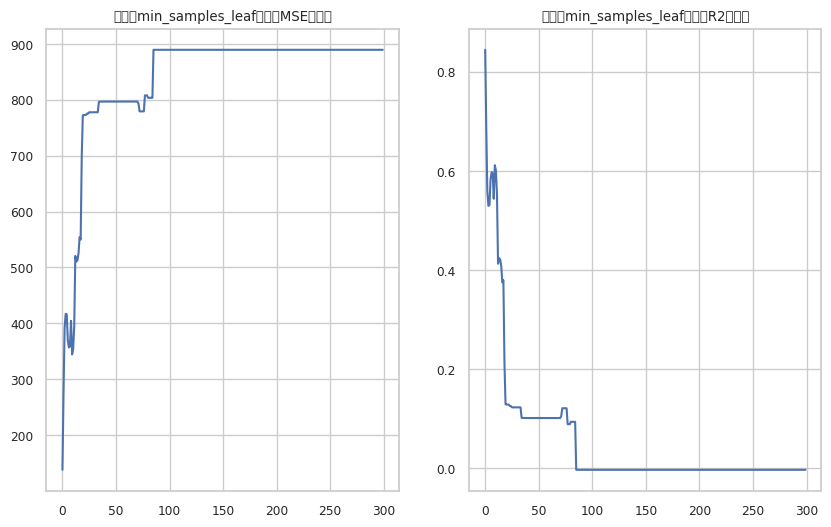

In [50]:
# 统计不同的值对随机森林的变化
cllo_mse = []
cllo_r2 = []
best_idx, best_mse, best_r2 = 0, 1000, 0
# 先查找 n_estimators ，其他参数默认
for i in range(1, 301):
    print(f'第{i+1}个')
    clf = RandomForestRegressor(random_state=42, n_estimators=3, max_features=24, min_samples_leaf=i)
    # 在训练集上拟合模型
    clf.fit(X_train,y_train)
    # 对测试集进行预测
    label_pred = clf.predict(X_test)
    # 计算MSE(平均误差)和精确度
    mse = mean_squared_error(y_test, label_pred)
    r2 = r2_score(y_test, label_pred)
    cllo_mse.append(mse)
    cllo_r2.append(r2)
    if best_mse > mse:
        best_mse = mse
        best_idx = i
        best_r2 = r2
name = 'min_samples_leaf'
print(f'在随机森林调优{name}过程中，最好的效果：mse:{best_mse:.5f}, r2:{best_r2:.5f}, {name}:{best_idx}')

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(cllo_mse)
plt.title(f'在调节{name}参数时MSE的变化')
plt.subplot(122)
plt.plot(cllo_r2)
plt.title(f'在调节{name}参数时R2的变化')
plt.show()

第2个
第3个
第4个
第5个
第6个
第7个
第8个
第9个
第10个
第11个
第12个
第13个
第14个
第15个
第16个
第17个
第18个
第19个
第20个
第21个
第22个
第23个
第24个
第25个
第26个
第27个
第28个
第29个
第30个
第31个
第32个
第33个
第34个
第35个
第36个
第37个
第38个
第39个
第40个
第41个
第42个
第43个
第44个
第45个
第46个
第47个
第48个
第49个
第50个
第51个
第52个
第53个
第54个
第55个
第56个
第57个
第58个
第59个
第60个
第61个
第62个
第63个
第64个
第65个
第66个
第67个
第68个
第69个
第70个
第71个
第72个
第73个
第74个
第75个
第76个
第77个
第78个
第79个
第80个
第81个
第82个
第83个
第84个
第85个
第86个
第87个
第88个
第89个
第90个
第91个
第92个
第93个
第94个
第95个
第96个
第97个
第98个
第99个
第100个
第101个
第102个
第103个
第104个
第105个
第106个
第107个
第108个
第109个
第110个
第111个
第112个
第113个
第114个
第115个
第116个
第117个
第118个
第119个
第120个
第121个
第122个
第123个
第124个
第125个
第126个
第127个
第128个
第129个
第130个
第131个
第132个
第133个
第134个
第135个
第136个
第137个
第138个
第139个
第140个
第141个
第142个
第143个
第144个
第145个
第146个
第147个
第148个
第149个
第150个
第151个
第152个
第153个
第154个
第155个
第156个
第157个
第158个
第159个
第160个
第161个
第162个
第163个
第164个
第165个
第166个
第167个
第168个
第169个
第170个
第171个
第172个
第173个
第174个
第175个
第176个
第177个
第178个
第179个
第180个
第181个
第182个
第183个
第184个
第185个
第1

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

第273个
第274个
第275个
第276个
第277个
第278个
第279个
第280个
第281个
第282个
第283个
第284个
第285个
第286个
第287个
第288个
第289个
第290个
第291个
第292个
第293个
第294个
第295个
第296个
第297个
第298个
第299个
第300个
第301个
在随机森林调优max_depth过程中，最好的效果：mse:122.81491, r2:0.86152, max_depth:31


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

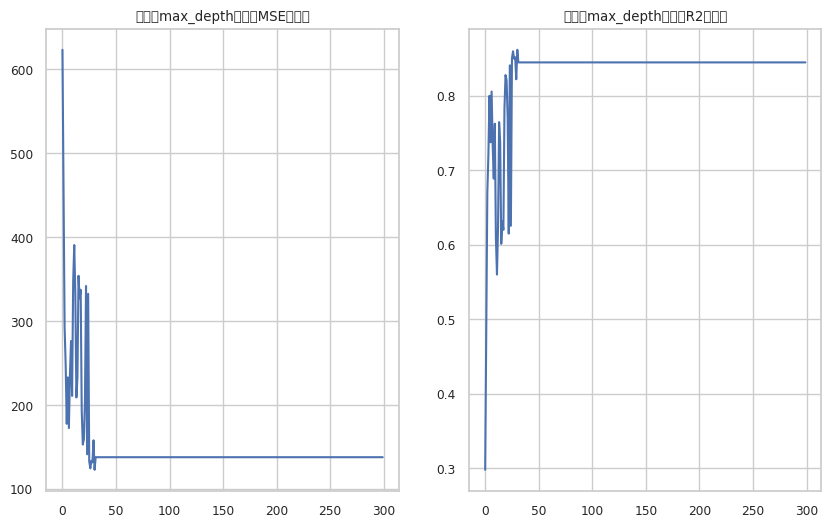

In [52]:
# 统计不同的值对随机森林的变化
cllo_mse = []
cllo_r2 = []
best_idx, best_mse, best_r2 = 0, 1000, 0
# 先查找 n_estimators ，其他参数默认
for i in range(1, 301):
    print(f'第{i+1}个')
    clf = RandomForestRegressor(random_state=42, n_estimators=3, max_features=24, min_samples_leaf=1, max_depth=i)
    # 在训练集上拟合模型
    clf.fit(X_train,y_train)
    # 对测试集进行预测
    label_pred = clf.predict(X_test)
    # 计算MSE(平均误差)和精确度
    mse = mean_squared_error(y_test, label_pred)
    r2 = r2_score(y_test, label_pred)
    cllo_mse.append(mse)
    cllo_r2.append(r2)
    if best_mse > mse:
        best_mse = mse
        best_idx = i
        best_r2 = r2
name = 'max_depth'
print(f'在随机森林调优{name}过程中，最好的效果：mse:{best_mse:.5f}, r2:{best_r2:.5f}, {name}:{best_idx}')

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(cllo_mse)
plt.title(f'在调节{name}参数时MSE的变化')
plt.subplot(122)
plt.plot(cllo_r2)
plt.title(f'在调节{name}参数时R2的变化')
plt.show()

In [53]:
# 创建随机森林分类器对象
clf = RandomForestRegressor(random_state=42, n_estimators=3, max_features=24, min_samples_leaf=1, max_depth=31)
# 在训练集上拟合模型
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
# 对测试集进行预测
label_pred = clf.predict(X_test)
# 计算MSE(平均误差)和精确度
mse = mean_squared_error(y_test, label_pred)
r2 = r2_score(y_test, label_pred)
# 输出模型评估结果和目标方程
print(f'MSE:{mse:.5f}')
print(f"R2: {r2:.5f}")

MSE:122.81491
R2: 0.86152


# 预测LiMn2O4

In [54]:
# 预测LiMn2O4
lmo_data = {
    'formula': [
        'LiMn2O4',
        'Li',
        'Li4Ti5O12',
        'LiCoO2',
        'LiFePO4',
        'Li6V6F24',
        'Li8V8F32'
    ]
}

# 根据字典初始化 DataFrame
lmo_data = pd.DataFrame(lmo_data)

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    lmo_data[element] = lmo_data['formula'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

print(lmo_data)

lmo_data = lmo_data.drop('formula', axis=1)
print(lmo_data)

lmo_pred = clf.predict(lmo_data)

print(f'lmo_pred: {lmo_pred}')

if need_to_normalized:
    # 将数据反归一化（归一化是 fit_transform
    salered_lmo_pred = scaler.inverse_transform(lmo_pred.reshape(-1,1))
    print(f'salered_lmo_pred: {salered_lmo_pred}')

     formula  Al  As  B  Ba  Bi  Br  C  Ca  Cd  ...  Tb  Te  Th   Ti    V  W  \
0    LiMn2O4   0   0  0   0   0   0  0   0   0  ...   0   0   0  0.0  0.0  0   
1         Li   0   0  0   0   0   0  0   0   0  ...   0   0   0  0.0  0.0  0   
2  Li4Ti5O12   0   0  0   0   0   0  0   0   0  ...   0   0   0  5.0  0.0  0   
3     LiCoO2   0   0  0   0   0   0  0   0   0  ...   0   0   0  0.0  0.0  0   
4    LiFePO4   0   0  0   0   0   0  0   0   0  ...   0   0   0  0.0  0.0  0   
5   Li6V6F24   0   0  0   0   0   0  0   0   0  ...   0   0   0  0.0  6.0  0   
6   Li8V8F32   0   0  0   0   0   0  0   0   0  ...   0   0   0  0.0  8.0  0   

   Y  Yb  Zn  Zr  
0  0   0   0   0  
1  0   0   0   0  
2  0   0   0   0  
3  0   0   0   0  
4  0   0   0   0  
5  0   0   0   0  
6  0   0   0   0  

[7 rows x 67 columns]
   Al  As  B  Ba  Bi  Br  C  Ca  Cd  Ce  ...  Tb  Te  Th   Ti    V  W  Y  Yb  \
0   0   0  0   0   0   0  0   0   0   0  ...   0   0   0  0.0  0.0  0  0   0   
1   0   0  0   0   0   0

# 预测Li

In [ ]:
# 预测Li
li_data = {
    'Normalized_Formulas': 'Li'
}

# 根据字典初始化 DataFrame
lmo_data = pd.DataFrame(lmo_data, index=[0])

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    lmo_data[element] = lmo_data['Normalized_Formulas'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

print(lmo_data)

lmo_data = lmo_data.drop('Normalized_Formulas', axis=1)
print(lmo_data)

lmo_pred = clf.predict(lmo_data)

print(f'lmo_pred: {lmo_pred}')

if need_to_normalized:
    # 将数据反归一化（归一化是 fit_transform
    salered_lmo_pred = scaler.inverse_transform(lmo_pred.reshape(-1,1))
    print(f'salered_lmo_pred: {salered_lmo_pred}')

In [46]:
def find_closest_numbers(numbers, target, n_closest=10):
    # 计算每个数字与目标值的绝对差值和索引
    differences = [(abs(num - target), index, num) for index, num in enumerate(numbers)]
    
    # 按照差值进行排序
    closest_numbers = sorted(differences)[:n_closest]
    
    return closest_numbers

# 预测LATP

In [ ]:
latp_data_raw = pd.read_excel('./dataset/pred33Ti.xlsx')
latp_data = latp_data_raw[['pretty_formula']]
print(latp_data.head())

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    latp_data[element] = latp_data['pretty_formula'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

latp_data = latp_data.drop('pretty_formula', axis=1)
print(latp_data.head())

latp_pred = clf.predict(latp_data)

print(f'latp_pred: {latp_pred}')

# sorted_latp_pred = sorted(latp_pred, reverse=True)
# print(f'sorted_latp_pred: {sorted_latp_pred}')

target = 7.77845455
closest_numbers = find_closest_numbers(latp_pred, target, 50)

# 打印与目标值最接近的n个数字及其索引
for diff, index, number in closest_numbers:
    print(f"化学式: {latp_data_raw['pretty_formula'][index]}, 预测结果: {number}, 与 {target} 的差: {diff}, 索引: {index}, ")

if need_to_normalized:
    # 将数据反归一化（归一化是 fit_transform
    salered_latp_pred = scaler.inverse_transform(latp_pred.reshape(-1,1))
    print(f'salered_latp_pred: {salered_latp_pred}')
    sorted_salered_latp_pred = sorted(salered_latp_pred)
    print(f'sorted_salered_latp_pred: {sorted_salered_latp_pred}')


# 预测LATP（带离子电导率预测）

In [ ]:
latp_with_conductivity_data_raw = pd.read_csv('./dataset/pred33Ti_with_conductivity_prediction.csv', header=None)

latp_conductivity_column = latp_with_conductivity_data_raw.iloc[:, 1].reset_index(drop=True)
latp_formula_column = latp_with_conductivity_data_raw.iloc[:, 19].reset_index(drop=True)

latp_formula_column.name = 'pretty_formula'
latp_data = pd.DataFrame(latp_formula_column)
print(latp_data.head())

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    latp_data[element] = latp_data['pretty_formula'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

latp_data = latp_data.drop('pretty_formula', axis=1)
print(latp_data.head())

latp_pred = clf.predict(latp_data)

print(f'latp_pred: {latp_pred}')

if False:
    # 将数据反归一化（归一化是 fit_transform
    salered_latp_pred = scaler.inverse_transform(latp_pred.reshape(-1,1))
    print(f'salered_latp_pred: {salered_latp_pred}')

# 绘制图像，横轴是热膨胀系数，纵轴是锂离子电导率
print(len(latp_pred), len(latp_conductivity_column))

x = latp_pred
y = latp_conductivity_column
plt.figure(figsize=(8, 6))  # 设定图形大小
plt.scatter(x, y, color='blue', marker='o')  # 绘制散点
# plt.axvline(x=7, color='red', linestyle='--', label='x = 7')  # 红色虚线

plt.title('Scatter Plot of latp_pred vs latp_conductivity_column')  # 图标题
plt.xlabel('latp_pred')  # x轴标签
plt.ylabel('latp_conductivity_column')  # y轴标签
plt.grid(True)  # 显示网格
plt.show()  # 显示图形

# 找最大值
max_value = 0
max_index = 0
for i in range(len(latp_pred)):
    if latp_pred[i] > max_value:
        if latp_conductivity_column[i] is None:
            continue
        max_value = latp_pred[i]
        max_index = i

print(max_index)
print(max_value)
print(latp_formula_column[max_index])
print(f'conductivity: {latp_conductivity_column[max_index]}')
print(f'thermal expansion: {latp_pred[max_index]}')

# 找前10
latp_pred_series = pd.Series(latp_pred)
top10_indices = latp_pred_series.nlargest(10).index
for index in top10_indices:
    print(f'Index: {index}, thermal expansion: {latp_pred[index]}, formula: {latp_formula_column[index]}, conductivity: {latp_conductivity_column[index]}')

# 找锂离子电导率非空的前10
# 将 latp_conductivity_column 转为 Series 用于筛选
latp_conductivity_series = pd.Series(latp_conductivity_column)
# 过滤出有效的电导率数据（即不为 None 或 NaN 的值）
valid_indices = latp_conductivity_series.notnull()  # 找出有效的索引
# 创建一个包含有效电导率和对应热膨胀的数据
valid_latp_pred = latp_pred[valid_indices]  # 过滤出的对应的 latp_pred
# 将有效数据组合成 DataFrame
valid_df = pd.DataFrame({
    'latent_pred': valid_latp_pred,
    'conductivity': latp_conductivity_series[valid_indices]
})
# 找出去掉空值后的前10个最大的电导率
top10 = valid_df.nlargest(10, 'latent_pred')
# 输出结果
for index, row in top10.iterrows():
    pred_value = row['latent_pred']
    conductivity_value = row['conductivity']
    # 因为 row.index 这里取不到 latp_formula_column 的值
    # 需要在原始有效索引中找到对应的公式索引
    original_index = latp_conductivity_series.index[valid_indices][top10.index.get_loc(index)]  # 还原到原始索引
    formula_value = latp_formula_column[original_index]
    print(f'Index: {original_index}, thermal expansion: {pred_value}, formula: {formula_value}, conductivity: {conductivity_value}')

In [ ]:
import matplotlib.pyplot as plt
# 先将数据反归一化
salered_train_label_pred = scaler.inverse_transform(train_pred.reshape(-1,1))
salered_train_labels = scaler.inverse_transform(y_train)
plt.scatter(salered_train_labels, salered_train_label_pred, color='blue', label='Predicted vs True')
# 绘制Y=X的直线，表示完美预测
plt.plot([min(salered_train_labels), max(salered_train_label_pred)], [min(salered_train_labels), max(salered_train_label_pred)], 'r--', label='Perfect Prediction (Y=X)')
# 添加图例
plt.legend()
# 设置坐标轴标签
plt.xlabel('真确的值')
plt.ylabel('预测的值')
# 设置标题
plt.title('随机森林的训练集预测结果')
# 显示图形
plt.show()

# 预测集
salered_test_labels = scaler.inverse_transform(y_test)
salered_label_pred = scaler.inverse_transform(label_pred.reshape(-1,1))
plt.scatter(salered_test_labels, salered_label_pred, color='blue', label='Predicted vs True')
# 绘制Y=X的直线，表示完美预测
plt.plot([min(salered_test_labels), max(salered_label_pred)], [min(salered_test_labels), max(salered_label_pred)], 'r--', label='Perfect Prediction (Y=X)')
# 添加图例
plt.legend()
# 设置坐标轴标签
plt.xlabel('真确的值')
plt.ylabel('预测的值')
# 设置标题
plt.title('随机森林的测试集预测结果')
# 显示图形
plt.show()

# 查看预测的偏差值

In [ ]:

big_num = 0
small_num = 0
for i in range(len(label_pred)):
    if label_pred[i].mean() >= y_test[i].mean():
        big_num += 1
    else:
        small_num += 1
print(f'预测值大于原值的个数：{big_num}, 预测值小于原值的个数：{small_num}')

# 计算偏移量
value = []
for i in range(len(label_pred)):
    value.append(salered_test_labels[i] - salered_label_pred[i])

bins = np.arange(-70, 71, 10)  # 从-1到1，每隔0.1一个区间
counts, _ = np.histogram(value, bins=bins)
print(counts)
bin_centers = (bins[:-1] + bins[1:]) / 2
# 绘制柱形图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.bar(bin_centers, counts, width=5, color='skyblue', edgecolor='black')  # 宽度设置为0.1与区间宽度相匹配

# 添加标题和轴标签
plt.title('误差偏移量')
plt.xlabel('偏移量区间')
plt.ylabel('统计个数')

# 显示网格
plt.grid(True)
plt.show()